# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Ferdy Rizkiawan
- Email: ferdyrizkiawan@student.uns.ac.id
- Id Dicoding: ferdyrizz

## Menentukan Pertanyaan Bisnis

- Apakah lokasi para seller tersebar merata di setiap state?
- Kapan terakhir customer melakukan transaksi?
- Seberapa sering seorang customer melakukan pembelian?
- Berapa banyak uang yang dihabiskan customer?

## Menyiapkan semua library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
customers_df = pd.read_csv('customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
sellers_df = pd.read_csv('sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
geolocation_df = pd.read_csv('geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
order_items_df = pd.read_csv('order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Assessing Data

#### Customers
Pada pengecekan di bawah, didapatkan bahwa:

* Tidak ada kelasahan pada tipe data
* Tidak ada missing value
* Tidak ada duplicated data
* Tidak ada innacurate value





In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customers_df.duplicated().sum()

0

In [ ]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Sellers
Pada pengecekan di bawah, didapatkan bahwa:
* Tidak ada kelasahan pada tipe data
* Tidak ada missing value
* Tidak ada duplicated data
* Tidak ada innacurate value



In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
sellers_df.duplicated().sum()

0

In [ ]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


#### Geolocation
Pada pengecekan di bawah, didapatkan bahwa:
* Tidak ada kesalahan pada tipe data
* Tidak ada missing value
* **Terdapat duplicated data sebanyak 261831**
* Tidak ada innacurate value



In [ ]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
geolocation_df.duplicated().sum()

261831

In [ ]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Orders
Pada pengecekan di bawah, didapatkan bahwa:
* **Terdapat kesalahan tipe data pada column yang seharusnya bertipe datetime**
* **Terdapat missing value pada column 'order_approved_at', 'order_delivered_carrier_date', dan 'order_delivered_customer_date'**
* Tidak ada duplicated data
* Tidak ada innacurate value

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.duplicated().sum()

0

In [ ]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Order Items
Pada pengecekan di bawah, didapatkan bahwa:
* **Terdapat kesalahan tipe data pada column 'shipping_limit_date'**
* Tidak ada missing data
* Tidak ada duplicated data
* Tidak ada innacurate value

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_items_df.duplicated().sum()

0

In [ ]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Cleaning Data

#### Geolocation

In [ ]:
geolocation_df.drop_duplicates(inplace=True)
geolocation_df.duplicated().sum()

0

In [ ]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


#### Orders

In [ ]:
datetime_columns = ["order_purchase_timestamp",
                    "order_approved_at",
                    "order_delivered_carrier_date",
                    "order_delivered_customer_date",
                    "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Untuk mengatasi missing value nya saya tidak akan menghapus datanya karena cukup banyak dan berpengaruh terhadap hasil analisis. Oleh karena itu, di sini saya lebih memilih untuk menghapus ketiga column tersebut karena memang tidak dibutuhkan untuk analisis yang akan saya lakukan.**

In [ ]:
orders_df = orders_df.drop(columns=['order_approved_at',
                                    'order_delivered_carrier_date',
                                    'order_delivered_customer_date'])
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15


#### Order Items

In [ ]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


## Exploratory Data Analysis (EDA)

### Explore jumlah seller di tiap state

#### Buat list "unique_state" berisi nama-nama state yang diambil dari dataset geolocation

In [ ]:
unique_state = geolocation_df.geolocation_state.unique()
unique_state

array(['SP', 'RN', 'AC', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'AL', 'PB',
       'CE', 'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'DF', 'GO', 'RO', 'TO',
       'MT', 'MS', 'RS', 'PR', 'SC'], dtype=object)

#### Buat list "total" berisi jumlah seller tiap state

In [ ]:
total = []
for state in unique_state:
  total.append(sellers_df[sellers_df.seller_state == state].seller_state.count())
total = np.array(total)
total

array([1849,    5,    1,  171,   23,  244,   19,    2,    9,    0,    6,
         13,    1,    1,    1,    0,    1,    0,   30,   40,    2,    0,
          4,    5,  129,  349,  190])

#### Membuat table state gabungan data list unique_state dan total

In [ ]:
state_df = pd.DataFrame({
    'State': unique_state,
    'Count': total})
state_df.head()

,State,Count
0,SP,1849
1,RN,5
2,AC,1
3,RJ,171
4,ES,23


In [ ]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   27 non-null     object
 1   Count   27 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 560.0+ bytes


### Explore dataset customers, orders, dan order_items

#### Merge dataset orders dan customers

In [ ]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [ ]:
orders_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 5   customer_unique_id             99441 non-null  object        
 6   customer_zip_code_prefix       99441 non-null  int64         
 7   customer_city                  99441 non-null  object        
 8   customer_state                 99441 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 7.6+ MB


#### Menghitung total price dan membuat column baru pada dataset order_items

In [ ]:
order_items_df['total_price'] = order_items_df['price'] + order_items_df['freight_value']
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04


#### Merge dataset orders_customers dan orders_items

In [ ]:
all_df = pd.merge(
    left=order_items_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   total_price                    112650 non-null  float64       
 8   customer_id                    112650 non-null  object        
 9   order_status                   112650 non-null  object        
 10  order_purchase_timestamp       112650 non-null  datetime64[ns]
 11  

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah lokasi para seller tersebar merata di setiap state?

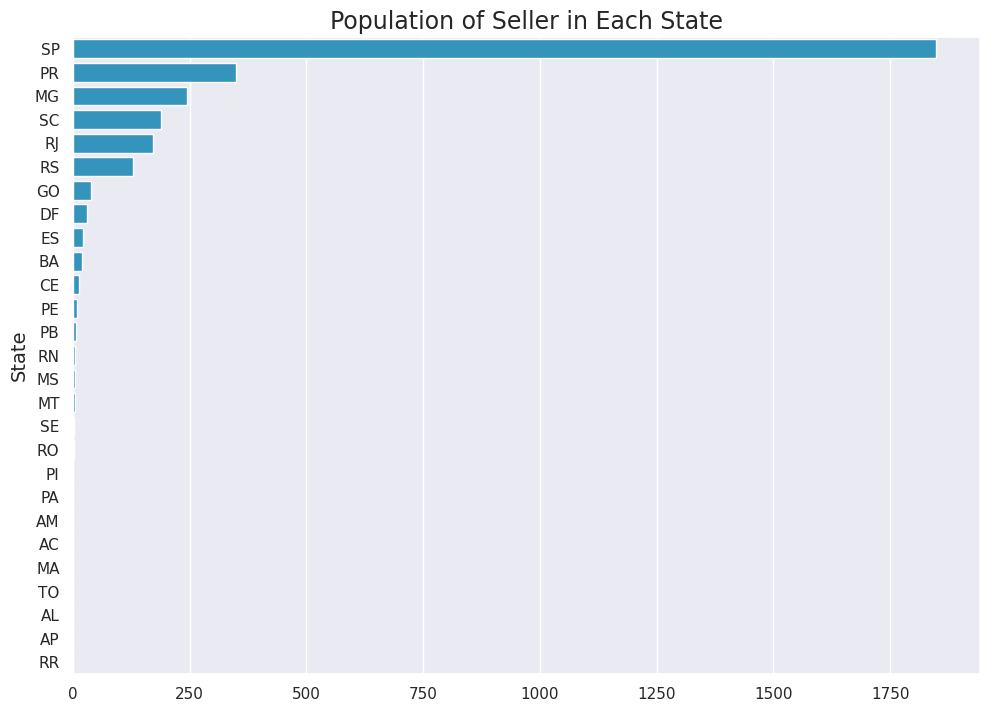

In [ ]:
state_df.sort_values(by='Count', inplace=True)
state_df = state_df[::-1] # reverse

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y=state_df['State'], x=state_df['Count'], orient='h', color='#1F9ED1')
plt.title("Population of Seller in Each State", size=17)
plt.xlabel(None)
plt.ylabel("State", size=14)
plt.show()

### Pertanyaan 2, 3, dan 4: RFM Analysis

#### Membuat dataset RFM yang dikategorikan berdasarkan customer_id

In [ ]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "total_price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  98666 non-null  object 
 1   frequency    98666 non-null  int64  
 2   monetary     98666 non-null  float64
 3   recency      98666 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.0+ MB


#### Membuat column baru berupa customer_name supaya lebih mudah saat menampilkan visual
Penjelasan : Column customer_name dibutuhkan supaya lebih rapi saat ditampilkan pada chart karena akan kurang bagus kalau menggunakan customer_id.

In [ ]:
customer_name = []
for i in range(1, 98667):
  customer_name.append("Customer " + str(i))

rfm_df['customer_name'] = customer_name
rfm_df.head()

,customer_id,frequency,monetary,recency,customer_name
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293,Customer 1
1,000161a058600d5901f007fab4c27140,1,67.41,414,Customer 2
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,552,Customer 3
3,0002414f95344307404f0ace7a26f1d5,1,179.35,383,Customer 4
4,000379cdec625522490c315e70c7a9fb,1,107.01,154,Customer 5


#### Menampilkan bar chart dari RFM

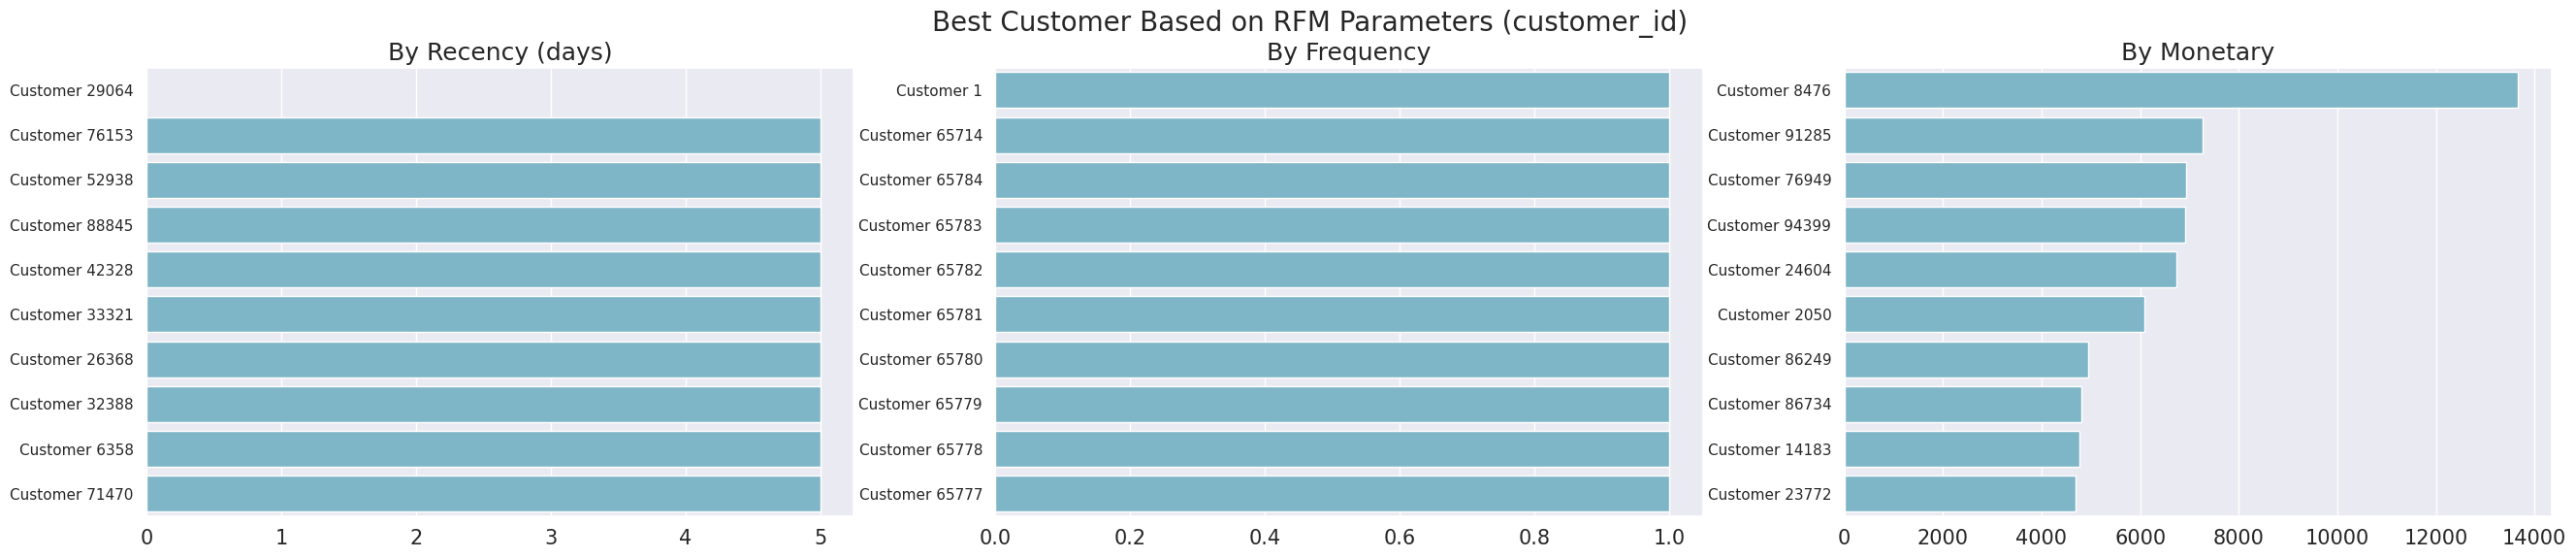

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(32, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(x="recency", y="customer_name", data=rfm_df.sort_values(by="recency", ascending=True).head(10), palette=colors, ax=ax[0], orient='h')
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(x="frequency", y="customer_name", data=rfm_df.sort_values(by="frequency", ascending=False).head(10), palette=colors, ax=ax[1], orient='h')
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(x="monetary", y="customer_name", data=rfm_df.sort_values(by="monetary", ascending=False).head(10), palette=colors, ax=ax[2], orient='h')
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Conclusion

### Pertanyaan 1: Apakah lokasi para seller tersebar merata di setiap state?

Tidak, para seller belum tersebar secara merata. Bahkan, hampir setengah dari total seller berasal dari state "SP". Dan setengah dari state yang ada memiliki total seller yang sangat jauh dibandingkan dengan 10 state terbanyak. Sehingga, perusahaan perlu mencari suatu mencari solusi atas permasalahan ini.

### Pertanyaan 2: Kapan terakhir customer melakukan transaksi?


Customer ke-29064 merupakan customer yang paling terakhir melakukan transaksi.

### Pertanyaan 3: Seberapa sering seorang customer melakukan pembelian?


Setelah dilakukan analisis dan visualisasi, rupaya setiap customer hanya melakukan satu kali pembelian. Oleh karena itu, perusahaan harus menganalisis lebih lanjut mengapa hal tersebut dapat terjadi.

### Pertanyaan 4: Berapa banyak uang yang dihabiskan customer?

Customer ke-8476 merupakan customer yang paling banyak mengeluarkan uang yaitu hampir sebesar 14000.

In [ ]:
all_df.to_csv("customer_order_data.csv", index=False)

In [ ]:
state_df.to_csv("state_data.csv", index=False)